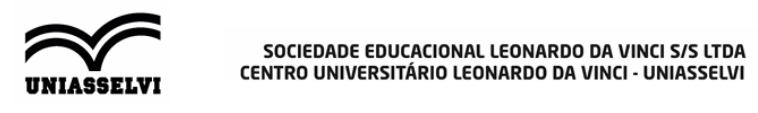

# Projeto II - Futuro dos Dados e Aplicação de Big Data  


## TEMA
Abalones - Agrupamento de Abalones baseado em características físicas.

## Descrição do tema

Abalones são moluscos marinhos notáveis, conhecidos por suas conchas multicoloridas e saborosa carne. Encontrados em diversas regiões do mundo, esses gastrópodes desempenham um papel vital nos ecossistemas marinhos, auxiliando na saúde dos recifes de algas. Na joalheria, as conchas de abalone são altamente valorizadas pela sua beleza única. Apresentam uma lenta taxa de crescimento e graças à ação do tempo, as conchas mais antigas tendem a ser mais raras e valiosas, exibindo iridescência mais complexa e cores vibrantes, tornando-as peças cobiçadas para criações de joias exclusivas.

A idade do abalone é determinada cortando a concha através do cone, tingindo-a e contando o número de anéis através de um microscópio - uma tarefa tediosa e demorada.Assim, outras medidas, mais fáceis de obter, são usadas para prever a idade. Mais informações, como padrões climáticos e localização (e, portanto, disponibilidade de alimentos) podem ser necessárias para resolver o problema.

Técnicas de mineração de dados, como clustering, são essenciais para transformar grandes volumes de dados em insights. É amplamnte utilizada com o objetivo de agrupar objetos similares em clusters ou grupos para identificar padrões e segmentos em conjuntos de dados complexos.Assim, criaremos um modelo que seja capaz de agrupar os abalones baseado em pesos, medidas e sexo, entre outras características a fim de visualizar padrões nas conchas utilizadas na fabricação de jóias.





## Objetivo

Criar um modelo que seja capaz de agrupar os abalones baseado em pesos, medidas e sexo, entre outras características a fim de visualizar padrões nas conchas utilizadas na fabricação de jóias.
Determinar faixa etária de abalones, bem como similaridades das conchas a partir de medidas físicas utilizando técnicas de agrupamento.

##Especificação Técnica:
Abalone Data:

Fonte: UCI Machine Learning Repository

Descrição: O conjunto de dados contém características físicas dos abalones, uma éspecie de gastrópode que possui carne saborosa utilizada pela alta gastronomia e uma valiosa concha muito cobiçada pela indústria de jóias.

Campos da Base de Dados:

* Sexo: M (masulino), F (feminino) e I (infantil)
        Tipo: Nominal
* Comprimento: Medida mais longa da concha em mm
        Tipo: Contínuo
* Diâmetro: Medida perpendicular ao comprimento em mm
        Tipo: Contínuo
* Altura: Medida com carne na concha em mm
        Tipo: Contínuo
* Peso total: Abalone inteiro bem gramas
        Tipo: Contínuo
* Peso limpo: Peso da carne em gramas
        Tipo: Contínuo
* Peso das vísceras: Peso das vísceras em gramas (após o sangramento)
        Tipo: Contínuo
* Peso da casca: Após ser seco em gramas
        Tipo: Contínuo
* Anéis: somado a  +1,5 dá a idade em anos
        Tipo: Inteiro

**Métodos de Machine Learning Utilizados**

Pré-processamento dos Dados:

*  Normalização ou padronização dos dados para garantir que todas as variáveis estejam na mesma escala.
*  Tratamento de valores ausentes e inconsistências nos dados.

Algoritmos de Clustering:
*  K-Means: Algoritmo de clustering particional que divide os dados em K clusters baseados na minimização da distância intra-cluster.


##Métodos de Machine Learning Utilizados

**Pré-Processamento**

- Criação de uma cópia do BD com Pandas Dataframes para habilitar alterações;
- Tradução das colunas do Dataframe;

 ***Realização da análise exploratória dos dados:***
- Verificação se há valores nulos ou vazios - não foram encontrados;
- Análise dos tipos de dados contidos no Dataframe;
- Aplicação da função strip  - não há espaços desnecessários na coluna que contém strings;
- Busca por outliers -  não foram encotrados;
*  Normalização ou padronização dos dados para garantir que todas as variáveis estejam na mesma escala.
*  Tratamento de valores ausentes e inconsistências nos dados.

**Algoritmos de Clustering utilizados**

*  K-Means: Algoritmo de clustering particional que divide os dados em K clusters baseados na minimização da distância intra-cluster.



***Instalando bibliotecas do repositório de dados UCI-Machine Learning Repository***

In [ ]:
!pip3 install -U ucimlrepo

***Importação das bibliotecas***

In [ ]:
# Importar as bibliotecas necessárias

import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from ucimlrepo import fetch_ucirepo
from sklearn import metrics, preprocessing
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")


***Importação do banco de dados e análise exploratória***



In [ ]:
# importando dataset
abalone = fetch_ucirepo(id=1)

# acessando os dados
df = abalone.data.original

# Imprimindo primeiras linhas
print(df.head())

# Mostrar informações básicas sobre o DataFrame
print("\nInformações sobre o conjunto de dados:")
print(df.info())

# Mostrar estatísticas descritivas do DataFrame
print("\nEstatísticas descritivas do conjunto de dados:")
print(df.describe())

# Verificar valores ausentes
print("\nValores ausentes no conjunto de dados:")
print(df.isnull().sum())

# Resultado esperado: sem valores ausentes, confirmando que não precisamos de tratamento adicional

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  

Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   

In [ ]:
df = abalone.data.original

# Verificando os nomes das colunas
print("Nomes das colunas no DataFrame:")
print(df.columns)

Nomes das colunas no DataFrame:
Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')


In [ ]:
# DataFrame: traduzindo os nomes das colunas
df.rename(columns={
    'Sex': 'Sexo',
    'Length': 'Comprimento',
    'Diameter': 'Diametro',
    'Height': 'Altura',
    'Whole_weight': 'Peso_total',
    'Shucked_weight': 'Peso_limpo',
    'Viscera_weight': 'Peso_visceras',
    'Shell_weight': 'Peso_casca',
    'Rings': 'Aneis'
}, inplace=True)

# Imprimindo detalhes do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sexo           4177 non-null   object 
 1   Comprimento    4177 non-null   float64
 2   Diametro       4177 non-null   float64
 3   Altura         4177 non-null   float64
 4   Peso_total     4177 non-null   float64
 5   Peso_limpo     4177 non-null   float64
 6   Peso_visceras  4177 non-null   float64
 7   Peso_casca     4177 non-null   float64
 8   Aneis          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# Verificando os dados da coluna Sexo
contagem_valores_sexo = df['Sexo'].value_counts()
print("Contagem de valores únicos na coluna 'Sexo':\n", contagem_valores_sexo)

Contagem de valores únicos na coluna 'Sexo':
 Sexo
M    1528
I    1342
F    1307
Name: count, dtype: int64


In [ ]:
# Subistituindo valores nominais (strings) da coluna sexo por valores inteiros e printando Dataframe pós alteração.
df["Sexo"] = df["Sexo"].replace({"M": 0, "F": 1, "I":2})
df.head()


,Sexo,Comprimento,Diametro,Altura,Peso_total,Peso_limpo,Peso_visceras,Peso_casca,Aneis
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
# Explorando Dataframe e extraindo algumas informações como média, mediana, valore mínimos e máximos.
df.describe()

,Sexo,Comprimento,Diametro,Altura,Peso_total,Peso_limpo,Peso_visceras,Peso_casca,Aneis
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


***Pré-processamento***

In [ ]:
# Normalizando os dados entre 0 e 1 com MinMax
# Selecionar as colunas que você deseja normalizar
colunas_para_normalizar = ['Sexo','Comprimento', 'Diametro', 'Altura', 'Peso_total', 'Peso_limpo', 'Peso_visceras', 'Peso_casca', 'Aneis']

# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a normalização Min-Max apenas nas colunas selecionadas
df[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])

# Visualizar os dados normalizados
print(df.head())


   Sexo  Comprimento  Diametro    Altura  Peso_total  Peso_limpo  \
0   0.0     0.513514  0.521008  0.084071    0.181335    0.150303   
1   0.0     0.371622  0.352941  0.079646    0.079157    0.066241   
2   0.5     0.614865  0.613445  0.119469    0.239065    0.171822   
3   0.0     0.493243  0.521008  0.110619    0.182044    0.144250   
4   1.0     0.344595  0.336134  0.070796    0.071897    0.059516   

   Peso_visceras  Peso_casca     Aneis  
0       0.132324    0.147982  0.500000  
1       0.063199    0.068261  0.214286  
2       0.185648    0.207773  0.285714  
3       0.149440    0.152965  0.321429  
4       0.051350    0.053313  0.214286  


In [ ]:
#Explorando Dataframe e extraindo algumas informações como média, mediana, valore mínimos e máximos após normalização.
df.describe()

,Sexo,Comprimento,Diametro,Altura,Peso_total,Peso_limpo,Peso_visceras,Peso_casca,Aneis
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.477735,0.606746,0.593078,0.123466,0.292808,0.241000,0.237121,0.236503,0.319060
std,0.413907,0.162288,0.166790,0.037015,0.173681,0.149269,0.144324,0.138717,0.115149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.506757,0.495798,0.101770,0.155658,0.124412,0.122449,0.128052,0.250000
50%,0.500000,0.635135,0.621849,0.123894,0.282451,0.225286,0.224490,0.231689,0.285714
75%,1.000000,0.729730,0.714286,0.146018,0.407650,0.336920,0.332456,0.326358,0.357143
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Detecção e Remoção de Outliers:** O código utiliza o método IQR para detectar e remover outliers, filtrando os dados de acordo com os limites definidos e exibindo as primeiras linhas e informações básicas após a remoção.

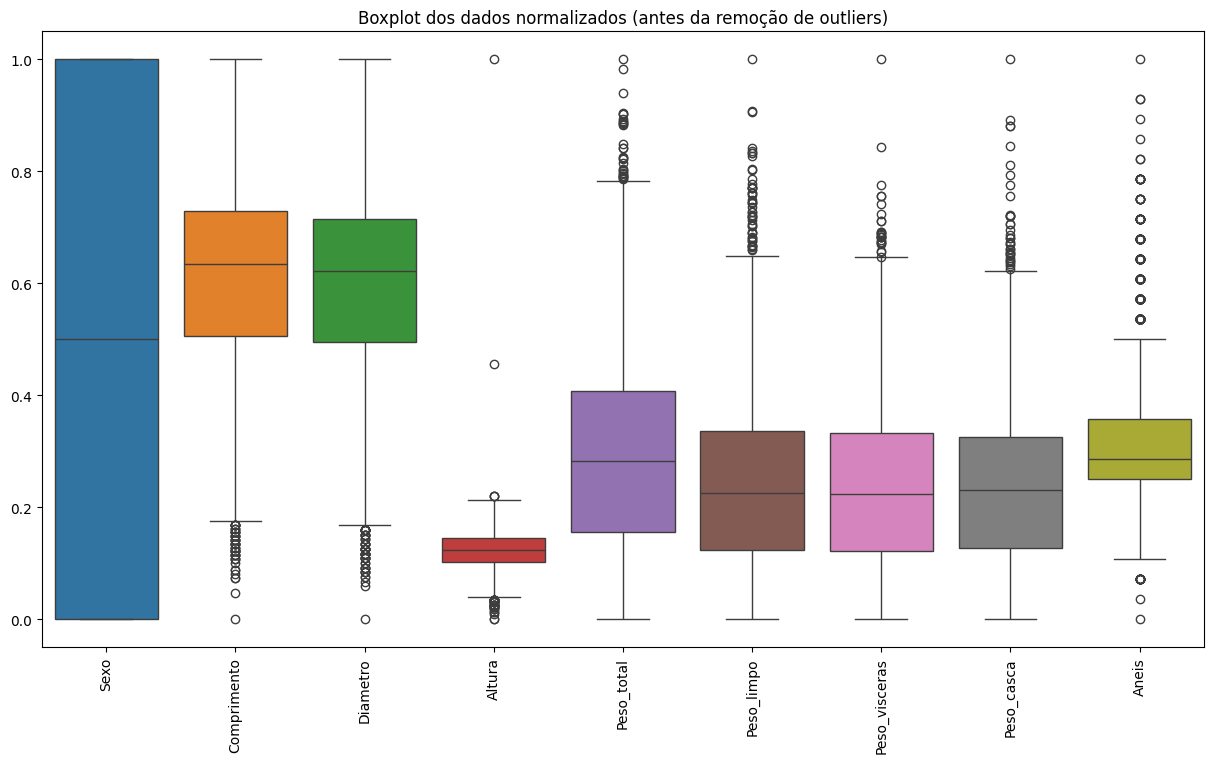


Primeiras linhas do conjunto de dados após a remoção de outliers:
   Sexo  Comprimento  Diametro    Altura  Peso_total  Peso_limpo  \
0   0.0     0.513514  0.521008  0.084071    0.181335    0.150303   
1   0.0     0.371622  0.352941  0.079646    0.079157    0.066241   
2   0.5     0.614865  0.613445  0.119469    0.239065    0.171822   
3   0.0     0.493243  0.521008  0.110619    0.182044    0.144250   
4   1.0     0.344595  0.336134  0.070796    0.071897    0.059516   

   Peso_visceras  Peso_casca     Aneis  
0       0.132324    0.147982  0.500000  
1       0.063199    0.068261  0.214286  
2       0.185648    0.207773  0.285714  
3       0.149440    0.152965  0.321429  
4       0.051350    0.053313  0.214286  

Informações sobre o conjunto de dados após a remoção de outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 3779 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sexo           37

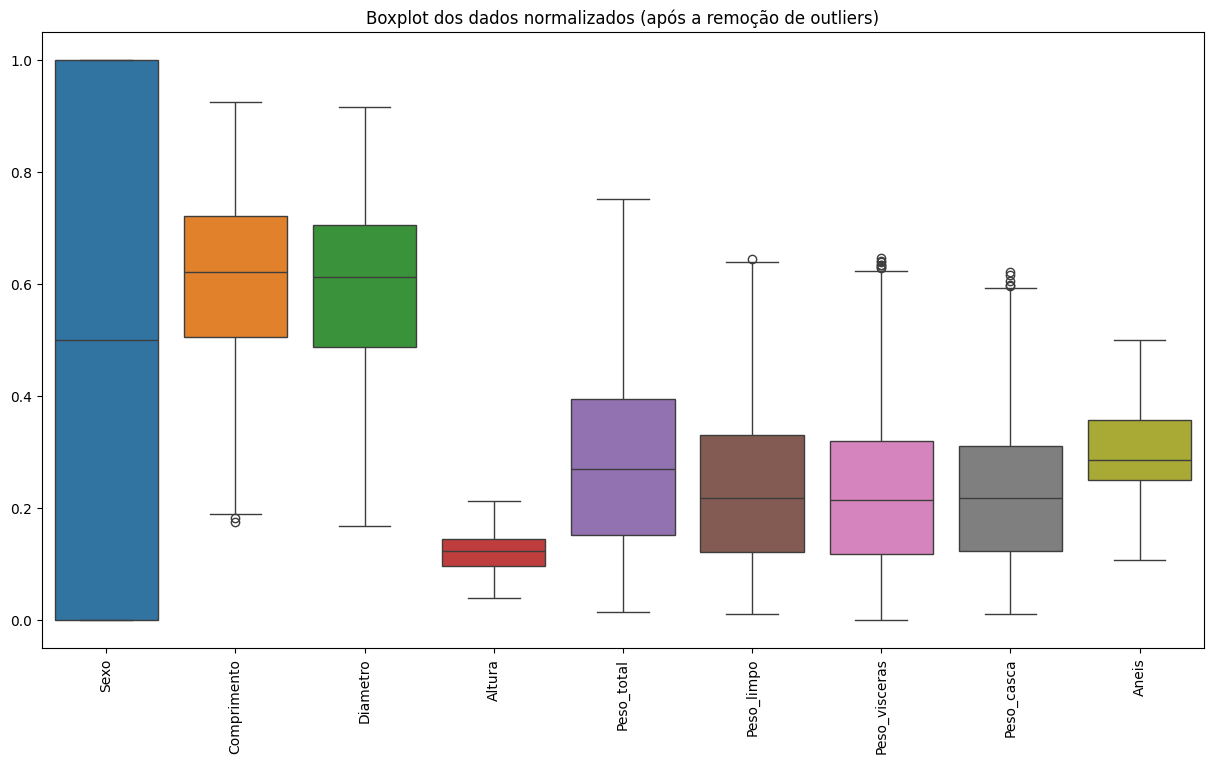

In [ ]:
# Visualizar os dados normalizados com boxplots antes da remoção de outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[colunas_para_normalizar])
plt.title("Boxplot dos dados normalizados (antes da remoção de outliers)")
plt.xticks(rotation=90)
plt.show()

# Remoção de outliers usando o método IQR (Interquartile Range)
Q1 = df[colunas_para_normalizar].quantile(0.25)
Q3 = df[colunas_para_normalizar].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para detecção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers
df_filtered = df[~((df[colunas_para_normalizar] < lower_bound) | (df[colunas_para_normalizar] > upper_bound)).any(axis=1)]

# Mostrar as primeiras linhas do DataFrame após a remoção de outliers
print("\nPrimeiras linhas do conjunto de dados após a remoção de outliers:")
print(df_filtered.head())

# Mostrar informações básicas sobre o conjunto de dados após a remoção de outliers
print("\nInformações sobre o conjunto de dados após a remoção de outliers:")
print(df_filtered.info())

# Mostrar estatísticas descritivas do conjunto de dados após a remoção de outliers
print("\nEstatísticas descritivas do conjunto de dados após a remoção de outliers:")
print(df_filtered.describe())

# Visualizar os dados normalizados com boxplots após a remoção de outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_filtered[colunas_para_normalizar])
plt.title("Boxplot dos dados normalizados (após a remoção de outliers)")
plt.xticks(rotation=90)
plt.show()

**Normalização dos Dados**:

# Implementação do Agrupamento

**Método Elbow**: O método Elbow foi implementado no código para ajudar a determinar o número apropriado de clusters para agrupar os abalones. A escolha correta do número de clusters é crucial para garantir que os clusters formados sejam significativos e úteis para a análise.


O gráfico gerado pelo método Elbow ajuda a visualizar o ponto onde a taxa de diminuição do SSE começa a se estabilizar. Esse ponto é considerado o número ótimo de clusters. No exemplo, escolhemos k=3k=3 como o número de clusters, pois o "cotovelo" do gráfico estava próximo desse valor, indicando que a adição de mais clusters além desse ponto resultaria em uma redução marginal na SSE. Essa escolha permite segmentar os abalones de forma eficiente, garantindo que os clusters formados sejam compactos e bem separados.

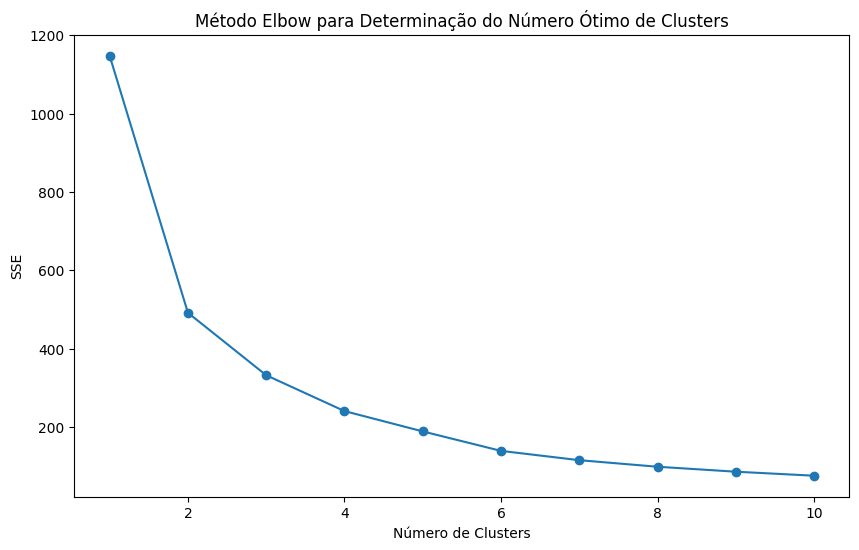

In [ ]:
# Determinar o número ótimo de clusters usando o método Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_filtered[colunas_para_normalizar])
    sse.append(kmeans.inertia_)

# Visualizar o gráfico Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método Elbow para Determinação do Número Ótimo de Clusters')
plt.show()

O algoritmo K-Means é uma técnica de clustering amplamente utilizada que particiona os dados em k clusters, onde cada ponto de dados pertence ao cluster com o centróide mais próximo. Abaixo, explicamos a aplicação do K-Means no código fornecido:
Passos do K-Means:


Escolha do Número de Clusters: Baseado na análise do método Elbow, escolhemos k=3k=3 como o número ótimo de clusters.

Inicialização e Treinamento do K-Means: Inicializamos o algoritmo K-Means com clusters=3 e random_state = 42 para garantir a reprodutibilidade dos resultados.    

In [ ]:
# Escolher o número de clusters (por exemplo, 3)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(df_filtered[colunas_para_normalizar])


Descrição


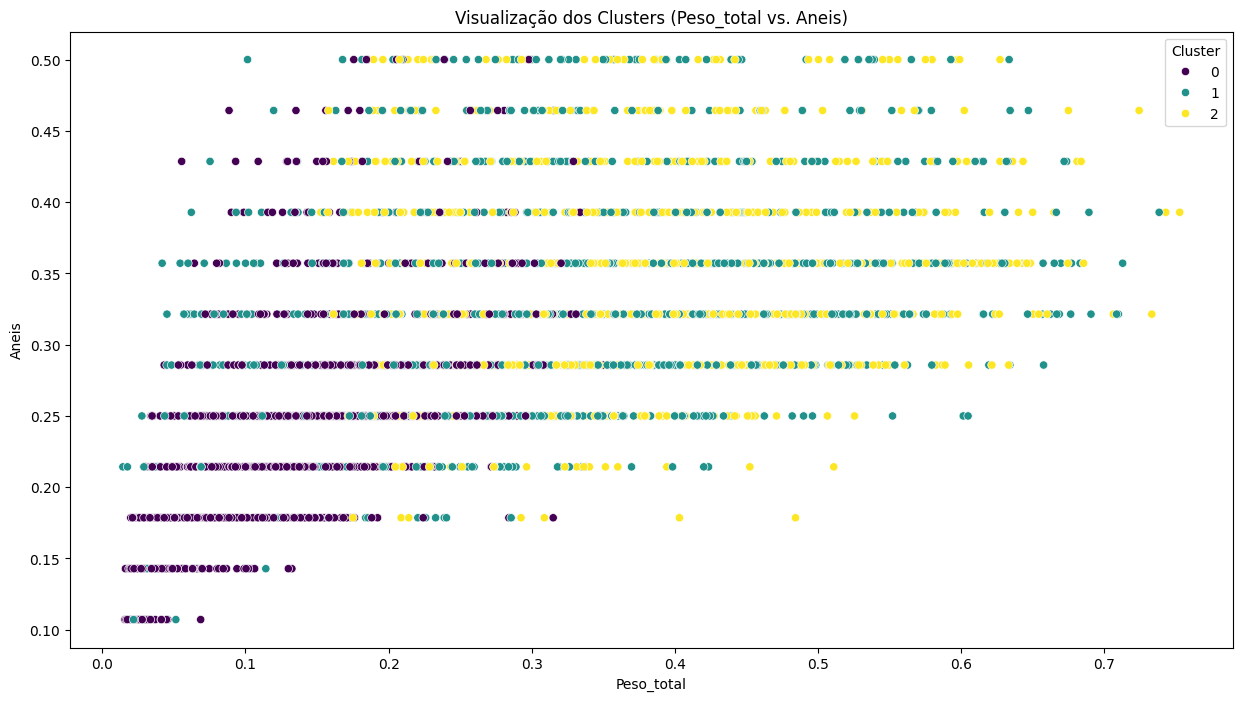

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_filtered, x='Peso_total', y='Aneis', hue='Cluster', palette='viridis')
plt.title('Visualização dos Clusters (Peso_total vs. Aneis)')
plt.show()

Descrição


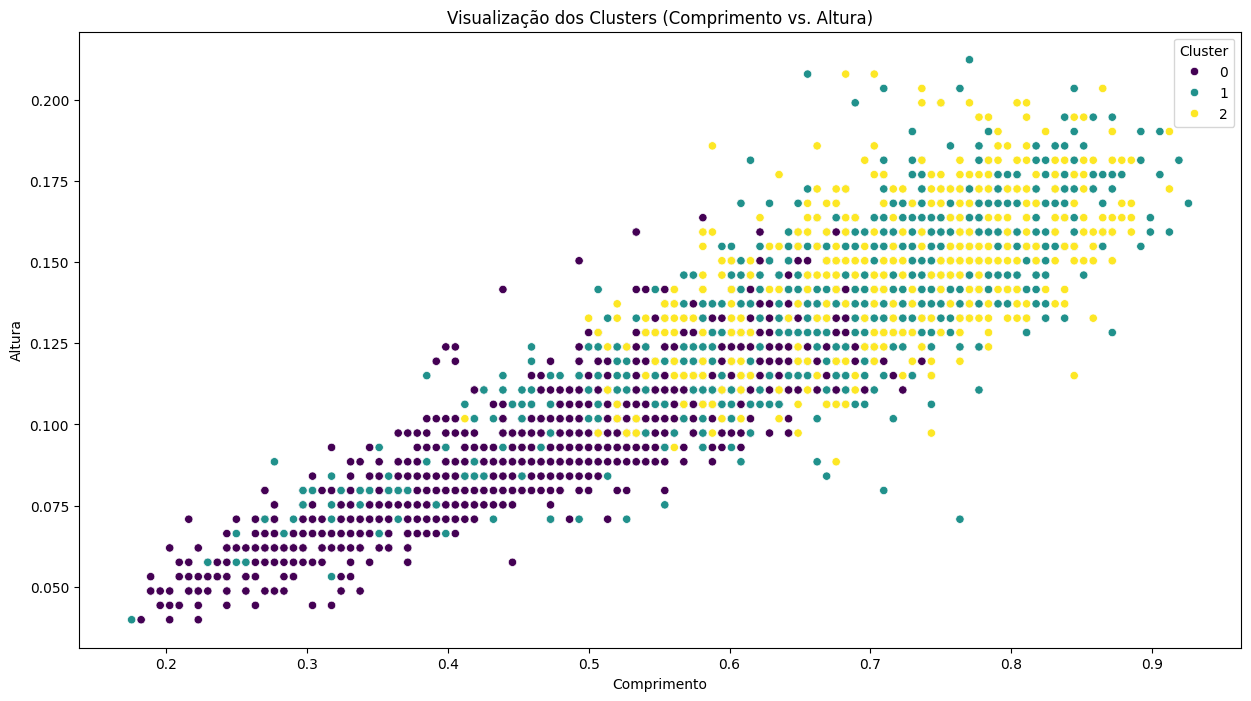

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_filtered, x='Comprimento', y='Altura', hue='Cluster', palette='viridis')
plt.title('Visualização dos Clusters (Comprimento vs. Altura)')
plt.show()

Descrição

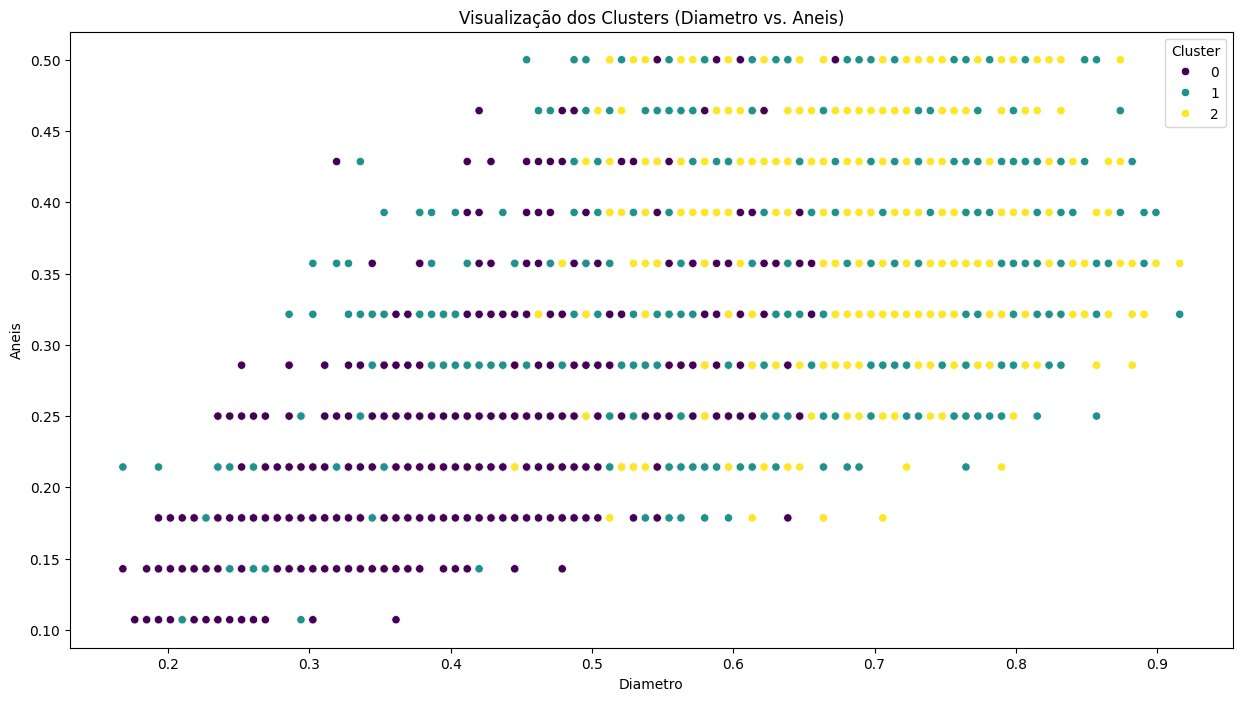

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df_filtered, x='Diametro', y='Aneis', hue='Cluster', palette='viridis')
plt.title('Visualização dos Clusters (Diametro vs. Aneis)')
plt.show()

Interpretação dos Clusters:

 * Cada cluster representado por uma cor diferente indica um grupo de abalones com padrões de características físicas semelhantes.
 *   As visualizações ajudam a identificar características comuns dentro de cada cluster, como tamanho aproximado das conchas.


A identificação de padrões nas conchas capturadas em determinada região poderiam gerar insights de ordem:
* Biológica/ambientais: calculando a idade dos abalones, correlacionado-a ao sexo é possível determinar se estão em idade reprodutiva e fazer projeções sobre risco de extinção.
* Mercadológico: determinando qual o padrão de conchas preferido pela indústria de jóias, é possível indicar maneiras mais assertivas para o "cultivo/criação" doa abalones para esse fim.

# Avaliação de Outros Métodos e Implementação

Para este projeto, vamos selecionar dois algoritmos de clustering para comparar com o K-Means. Cada algoritmo tem suas características e vantagens. Vamos utilizar o K-Means, DBSCAN e Agglomerative Clustering.

O Silhouette Score é uma métrica utilizada para avaliar a qualidade de clusters formados por algoritmos de clustering. Ele mede o quão bem cada ponto de dados está relacionado ao seu próprio cluster em comparação com outros clusters. A pontuação é calculada para cada ponto de dados e, em seguida, a média das pontuações individuais é tomada para obter a pontuação geral.

K-Means Silhouette Score: 0.4654974333386234


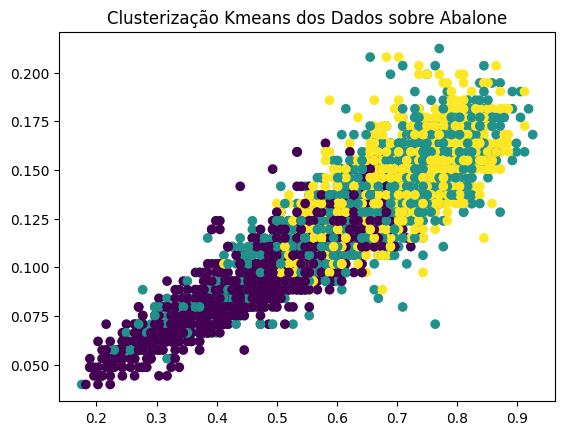

In [ ]:
# Aplicação do Algoritmo K-Means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_filtered['KMeans_Cluster'] = kmeans.fit_predict(df_filtered[colunas_para_normalizar])
kmeans_silhouette = silhouette_score(df_filtered[colunas_para_normalizar], df_filtered['KMeans_Cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
plt.scatter(x=df_filtered["Comprimento"], y=df_filtered["Altura"],
c=kmeans.labels_)
plt.title("Clusterização Kmeans dos Dados sobre Abalone")
plt.show()

DBSCAN Silhouette Score: 0.7891928033211432


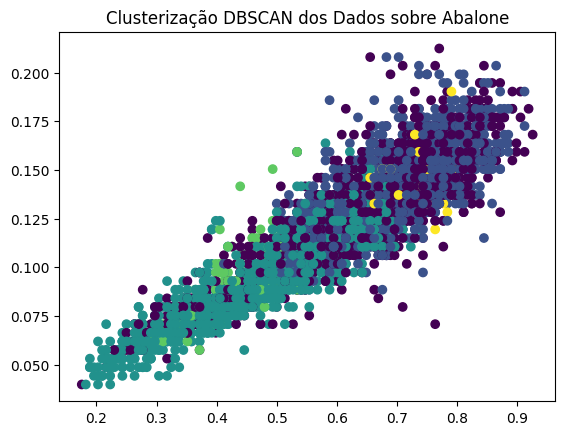

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_filtered['DBSCAN_Cluster'] = dbscan.fit_predict(df_filtered)
dbscan_silhouette = silhouette_score(df_filtered, df_filtered['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
plt.scatter(x=df_filtered["Comprimento"], y=df_filtered["Altura"],
c=dbscan.labels_)
plt.title("Clusterização DBSCAN dos Dados sobre Abalone")
plt.show()

Agglomerative Clustering Silhouette Score: 0.4216634951260846


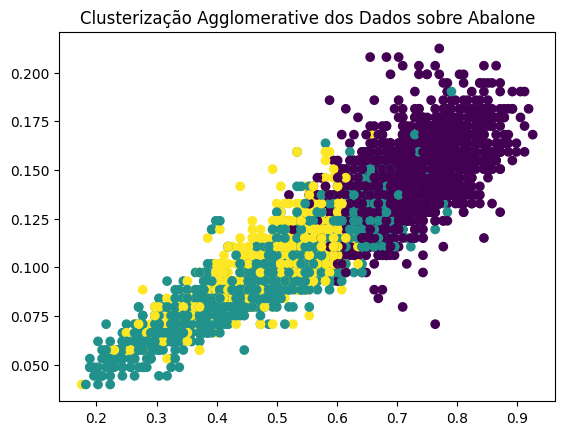

In [ ]:
# Aplicação do Algoritmo Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
df_filtered['Agglomerative_Cluster'] = agglomerative.fit_predict(df_filtered[colunas_para_normalizar])
agglomerative_silhouette = silhouette_score(df_filtered[colunas_para_normalizar], df_filtered['Agglomerative_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {agglomerative_silhouette}")
plt.scatter(x=df_filtered["Comprimento"], y=df_filtered["Altura"],
c=agglomerative.labels_)
plt.title("Clusterização Agglomerative dos Dados sobre Abalone")
plt.show()


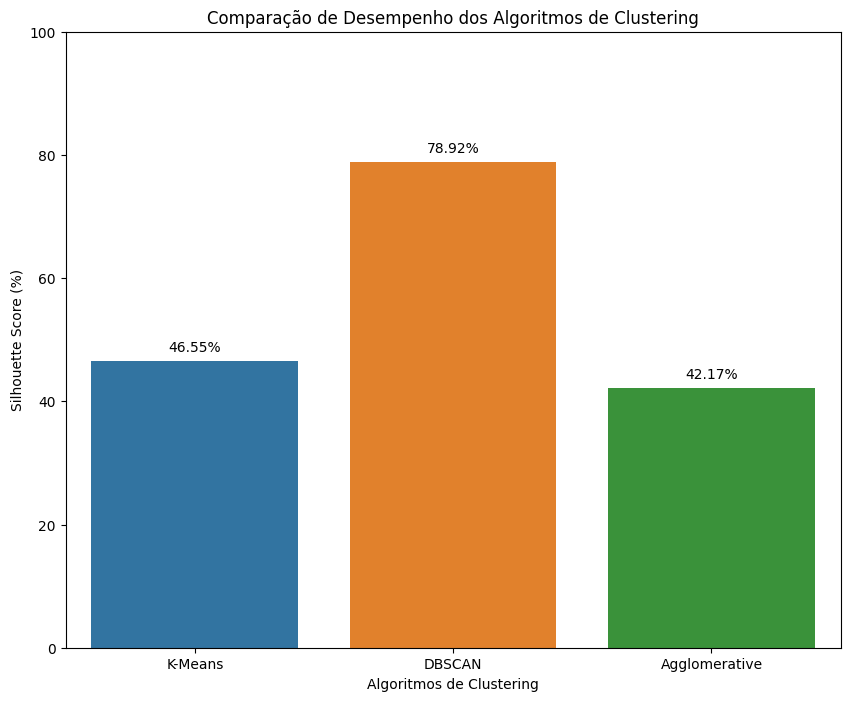

In [ ]:
# Comparação dos Resultados
algorithms = ['K-Means', 'DBSCAN', 'Agglomerative']
silhouette_scores = [kmeans_silhouette, dbscan_silhouette, agglomerative_silhouette]

# Convertendo os silhouette_scores para porcentagem
silhouette_scores_percentage = [score * 100 for score in silhouette_scores]

# Definindo cores específicas para cada barra
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=algorithms, y=silhouette_scores_percentage, palette=colors)
plt.xlabel('Algoritmos de Clustering')
plt.ylabel('Silhouette Score (%)')
plt.title('Comparação de Desempenho dos Algoritmos de Clustering')
plt.ylim(0, 100)


# Adicionando rótulos nas barras
for index, score in enumerate(silhouette_scores_percentage):
    barplot.text(index, score + 1, f'{score:.2f}%', ha='center', va='bottom')

plt.show()


#Aplicação e Predição:

Dado que o Dbscan demonstrou melhor desempenho no agrupamento dos abalones, vamos agora implementar uma função preditiva. Esta função receberá os dados de um novo abalone, com base nos clusters previamente gerados, indicará a qual cluster o abalone pertence. Além disso, a função visualizará graficamente a posição deste novo abalone em relação aos clusters existentes.


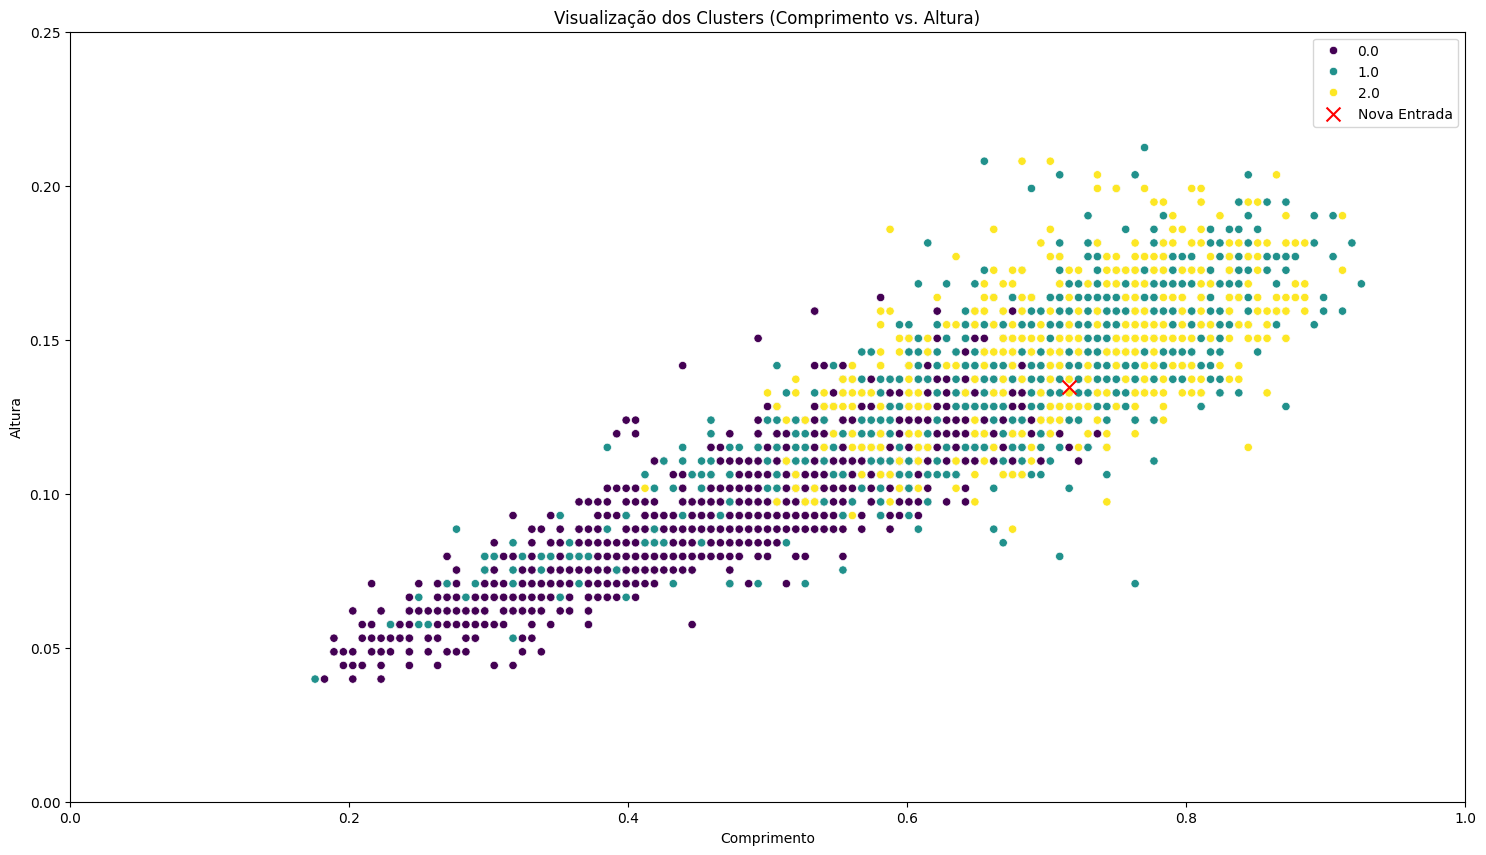

A nova entrada pertence ao cluster: 2


In [ ]:
# Seleção do Melhor Algoritmo (neste exemplo, escolhemos DBSCAN como o melhor)
best_algorithm = 'K-Means'

# Criar o preditor para uma nova entrada
def predict_new_entry(new_data):
    # Transformar novos dados em DataFrame
    new_data_df = pd.DataFrame([new_data], columns=colunas_para_normalizar)

    # Normalizar os novos dados
    new_data_scaled = scaler.transform(new_data_df)

    # Predizer o cluster utilizando KMeans.
    new_cluster = kmeans.predict(new_data_scaled)

    # Mostrar a nova entrada no gráfico
    df_temp = df_filtered.copy()
    new_data_scaled_df = pd.DataFrame(new_data_scaled, columns=colunas_para_normalizar)
    new_data_scaled_df['Cluster'] = new_cluster[0]
    df_temp = pd.concat([df_temp, new_data_scaled_df], ignore_index=True)

    plt.figure(figsize=(18, 10))
    sns.scatterplot(data=df_temp, x='Comprimento', y='Altura', hue='KMeans_Cluster', palette='viridis')
    plt.scatter(new_data_scaled_df['Comprimento'], new_data_scaled_df['Altura'], color='red', marker='x', s=100, label='Nova Entrada')
    plt.title('Visualização dos Clusters (Comprimento vs. Altura)')
    plt.ylim(0, 0.25)
    plt.xlim(0, 1)
    plt.legend()
    plt.show()

    return new_cluster[0]

# Nova entrada para predição
nova_entrada = [1,0.605, 0.429, 0.152, 0.3250, 0.1131, 0.0620, 0.0190, 6]
predicted_cluster = predict_new_entry(nova_entrada)
print(f"A nova entrada pertence ao cluster: {predicted_cluster}")

## Conclusão
O estudo realizado sobre o dataset de abalones utilizou diversas técnicas de pré-processamento de dados, análise exploratória e algoritmos de clusterização para extrair insights sobre as características e agrupamentos dos abalones.
O estudo demonstrou a eficácia de diferentes técnicas de clusterização na análise de dados sobre abalones, destacando-se o DBSCAN como o algoritmo com melhor desempenho para este conjunto de dados.
A capacidade de prever e visualizar novos dados dentro do contexto dos clusters existentes fornece uma ferramenta valiosa para a classificação e análise de novas amostras de abalones. Não obstante o trabalho realizado pode ser expandido para incluir outros algoritmos de machine learning para potencialmente melhorar a precisão e a utilidade das previsões.
